In [1]:
!mamba install t-coffee mmseqs2 -y -q

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [1]:
from learnMSA.msa_hmm import Configuration, Align, Visualize
from learnMSA.msa_hmm.SequenceDataset import SequenceDataset

2023-08-22 12:40:12.345685: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-22 12:40:12.421806: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-22 12:40:12.436978: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-08-22 12:40:12.695310: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvi

## learnMSA demo

In this notebook, we will fit a number of HMM models to a dataset of unaligned sequences. 
We will then use the fitted models to align the sequences and compare the results.
Moreover, we will visualize the best (according to an objective criterion) model and alignment.

*This notebook is meant to be a demo for running learnMSA in Python code. Check the readme if you want to run learnMSA from the command line.* 

Change the variables in the following cell to fit your needs.

In [2]:
# Your fasta file with unaligned sequences.

train_filename = "test/data/egf.fasta"

# Reference file with aligned sequences that have matching IDs to (potentially a subset of) the 
# sequences in the train_file.
# Replace with empty string if no reference is available.
ref_filename = "test/data/egf.ref"

# The number of independently trained models.
num_models = 2

# Use sequence weights based on a rapid pre-clustering of the sequences (requires mmseqs2 to be installed)
use_weights = True

# Align long insertions with an external aligner left unaligned by the main MSA stage (requires famsa to be installed).
align_insertions = True

## Run learnMSA from Python (Training + Viterbi alignment)

Training of 2 models on file egf.fasta
Configuration: 
{
num_models : 2
transitioner : ProfileHMMTransitioner(
 transition_init=
    {
    begin_to_match : DefaultEntry() , match_to_end : DefaultExit() , 
    match_to_match : DefaultMatchTransition(1) , match_to_insert : DefaultMatchTransition(-1) , 
    insert_to_match : Norm(0, 0.1) , insert_to_insert : Norm(-0.5, 0.1) , 
    match_to_delete : DefaultMatchTransition(-1) , delete_to_match : Norm(0, 0.1) , 
    delete_to_delete : Norm(-0.5, 0.1) , left_flank_loop : Norm(0, 0.1) , 
    left_flank_exit : Norm(-1, 0.1) , right_flank_loop : Norm(0, 0.1) , 
    right_flank_exit : Norm(-1, 0.1) , unannotated_segment_loop : Norm(0, 0.1) , 
    unannotated_segment_exit : Norm(-1, 0.1) , end_to_unannotated_segment : Norm(-9, 0.1) , 
    end_to_right_flank : Norm(0, 0.1) , end_to_terminal : Norm(0, 0.1)
    },
 flank_init=Const(0.0),
 prior=ProfileHMMTransitionPrior(match_comp=1, insert_comp=1, delete_comp=1, alpha_flank=7000, alpha_single=10000

2023-08-22 12:40:21.792537: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x555cfee91e70


17/17 - 5s - loss: 115.7882 - loglik: -9.3403e+01 - logprior: -2.2386e+01 - 5s/epoch - 273ms/step
Epoch 2/10
17/17 - 1s - loss: 80.8823 - loglik: -7.5872e+01 - logprior: -5.0102e+00 - 796ms/epoch - 47ms/step
Epoch 3/10
17/17 - 1s - loss: 72.1491 - loglik: -6.9122e+01 - logprior: -3.0274e+00 - 844ms/epoch - 50ms/step
Epoch 4/10
17/17 - 1s - loss: 69.6229 - loglik: -6.7175e+01 - logprior: -2.4478e+00 - 769ms/epoch - 45ms/step
Epoch 5/10
17/17 - 1s - loss: 69.6329 - loglik: -6.7437e+01 - logprior: -2.1964e+00 - 821ms/epoch - 48ms/step
expansions model 0: [(10, 1), (11, 2), (12, 3), (13, 1), (16, 1), (18, 2)]
discards model 0: []
expansions model 1: [(10, 1), (11, 2), (12, 3), (13, 1), (16, 1), (18, 2)]
discards model 1: []
Re-initialized the encoder parameters.
Fitting models of lengths [34, 34] on 7774 sequences.
Batch size= 512 Learning rate= 0.1
Using sequence weights  [1.         0.33333334 0.07692308 ... 0.04347826 0.02777778 0.25      ] .
Using 1 GPUs.
Epoch 1/2
17/17 - 5s - loss: 8

2023-08-22 12:40:56.246366: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Aligning 2 insertion slices with famsa.
time for generating output: 0.8833
Wrote file test/data/interactive.alignment.fasta
16/16 [==============================] - 1s 15ms/step
>l=-54.34_t=0.01
............$C.D.......P........N............P........CYN.HG..T..C...S.......L......RA...T......................G.....YTCSCL....PR......YT....GEH$.......................
>l=-56.71_t=0.00
............$C.D.......S........Q............P........CRN.-G..T..C...Sl......N......TN...T......................D.....YTCACF....PG......YT....GRY$.......................
>l=-49.64_t=0.00
............$C.D.......S........D............P........CLN.GG..T..C...T.......L......RSl..D......................S.....YSCACA....PG......YT....GQH$.......................
>l=-62.59_t=0.01
............$C.D.......H........V............T........CLN.GG..T..C...Q.......Lk.....TL...E......................D.....YTCACA....NG......YT....GER$.......................
>l=-63.37_t=0.00
............$C.D.......H........V............T........CLN

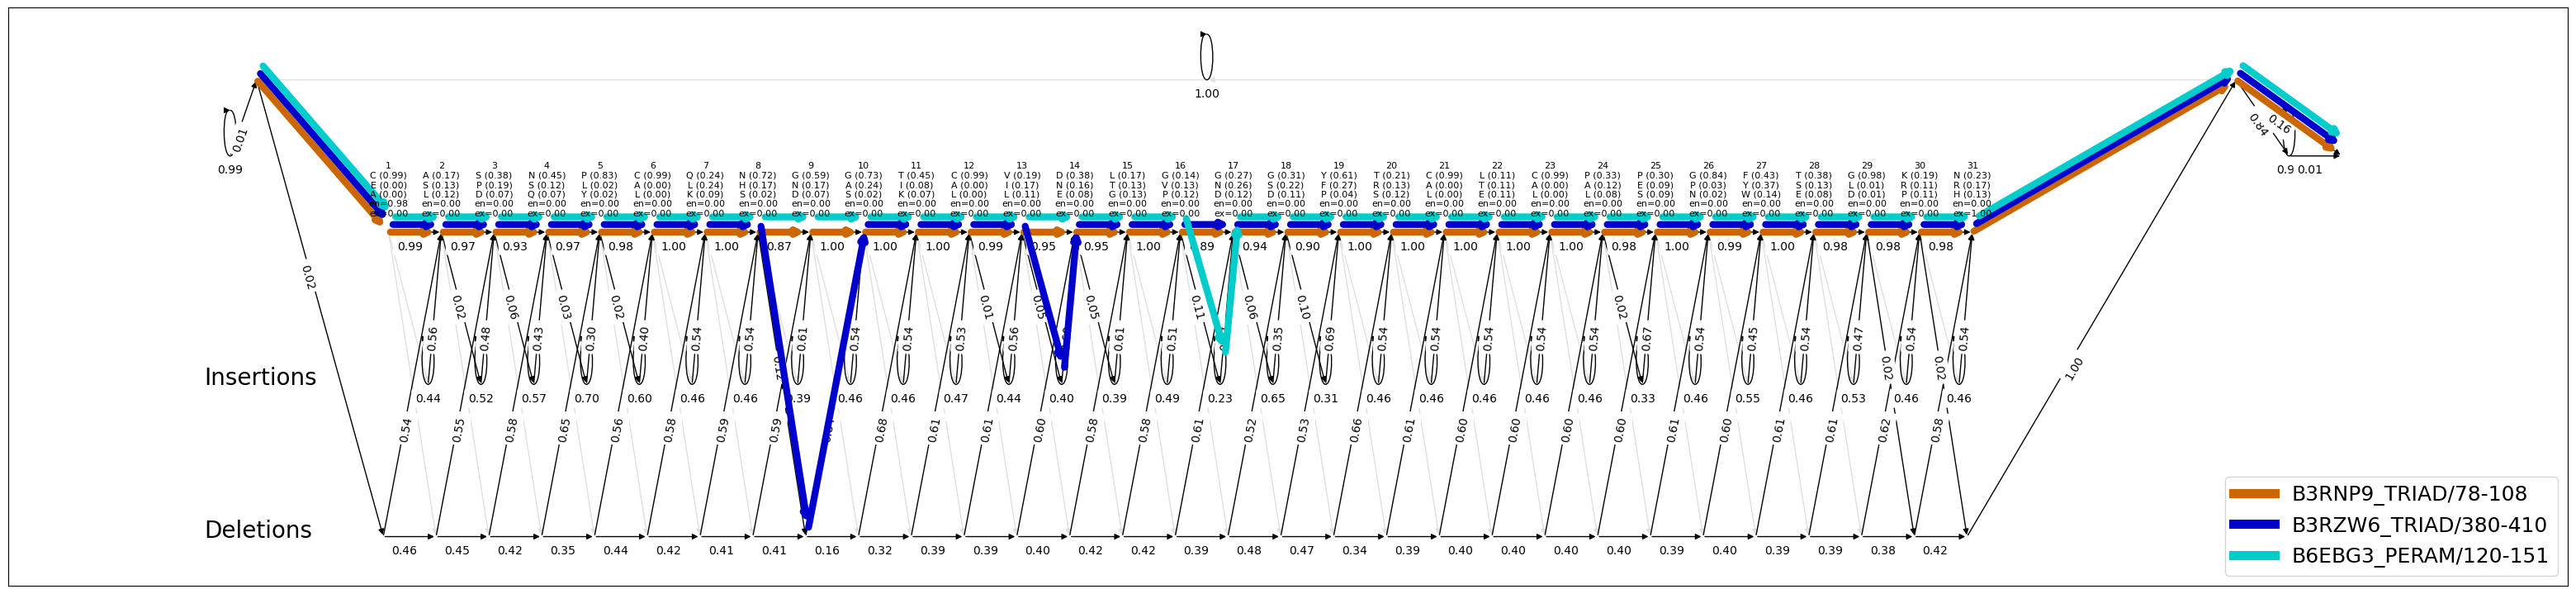

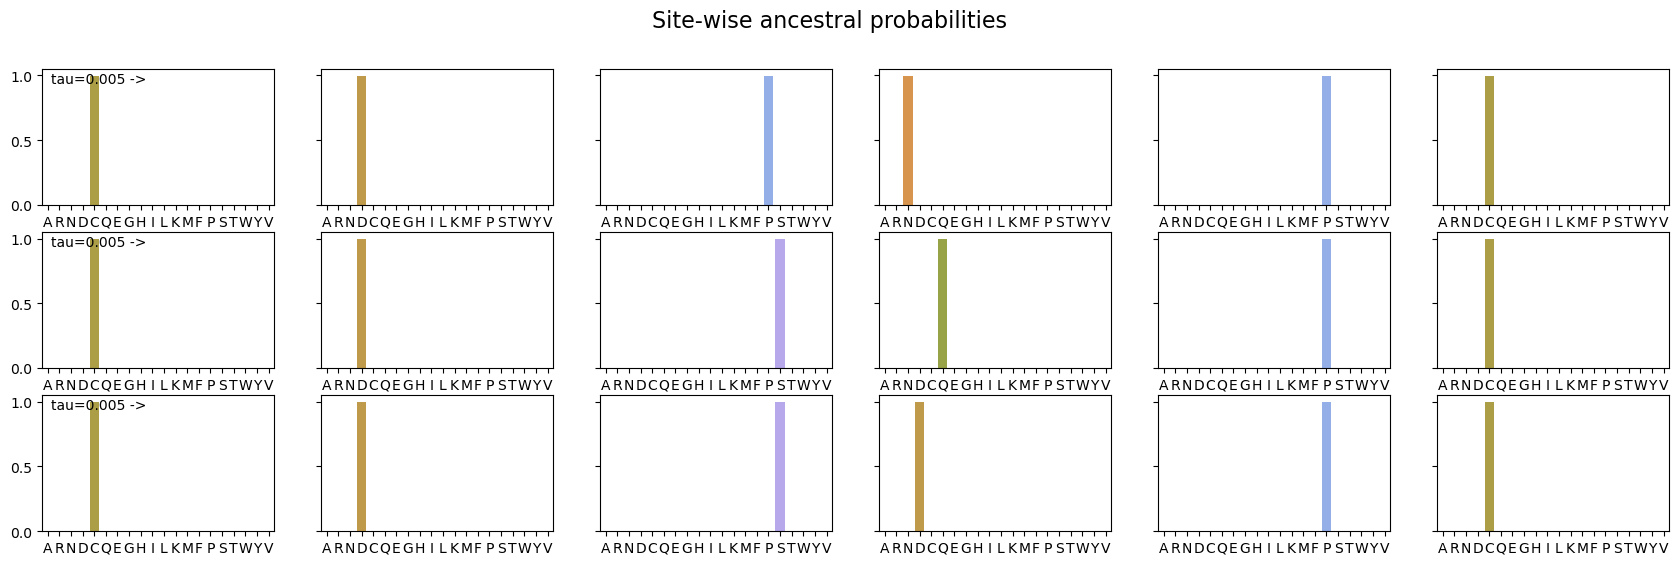

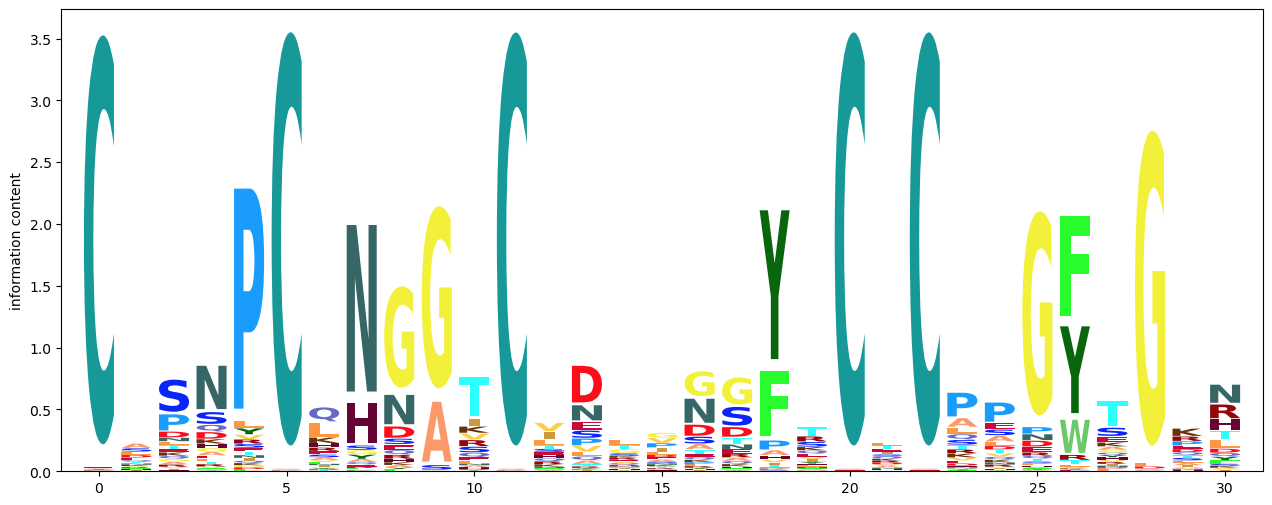

In [3]:
out_filename = "test/data/interactive.alignment.fasta"
config = Configuration.make_default(num_models)
with SequenceDataset(train_filename, fmt="fasta") as data:
    alignment_model = Align.run_learnMSA(data,
                                        out_filename,
                                        config, 
                                        sequence_weights=Align.compute_sequence_weights(train_filename, "tmp") if use_weights else None,
                                        verbose=True,
                                        align_insertions=align_insertions)
    Visualize.print_and_plot(alignment_model, alignment_model.best_model)

In [4]:
!id_list=$(sed -n '/^>/p' {ref_filename} | sed 's/^.//') ; export MAX_N_PID_4_TCOFFEE=10000000 ; t_coffee -other_pg seq_reformat -in test/data/interactive.alignment.fasta -action +extract_seq_list ${{id_list[@]}} +rm_gap > test/data/interactive.projection.fasta

HERE: 1ixa
HERE: 1apo
HERE: 1urk
HERE: 1fsb
HERE: 1esl
HERE: 1hre
HERE: 1epi
HERE: 4tgf
HERE: 1hcgb
HERE: 1dan1
HERE: 1dan2
HERE: 1rfnb


In [5]:
!t_coffee -other_pg aln_compare -al1 {ref_filename} -al2 test/data/interactive.projection.fasta -compare_mode sp

*****************************************************
seq1       seq2          Sim   [ALL]           Tot  
egf           12         31.1    77.2 [100.0]   [ 5182]
